<a href="https://colab.research.google.com/github/kitigai/LearnDL/blob/master/GAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from keras.models import Sequential
from keras.layers import ZeroPadding2D, Activation, Input, LeakyReLU, Reshape
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers.normalization import BatchNormalization
#from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
# import datasets
from keras.datasets import fashion_mnist

import numpy as np

from matplotlib import pyplot as plt


In [ ]:
class GAN():
  def __init__(self):
    self.img_rows = 28
    self.img_cols = 28
    self.channels = 1
    self.img_shape = (self.img_rows, self.img_cols, self.channels)

    optimizer = Adam(0.0002, 0.5)

    self.discriminator = self.define_discriminator()
    self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    self.generator = self.define_generator()
    self.generator.compile(loss='binary_crossentropy', optimizer = optimizer)

    z = Input(shape=(100,))
    img = self.generator(z)

    self.discriminator.trainable = False

    valid = self.discriminator(img)

    self.combined = Model(z, valid)
    self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

  def define_generator(self):
    noise_shape = (100, )
    model = Sequential()
    model.add(Dense(256, input_shape=noise_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(np.prod(self.img_shape), activation='tanh'))
    model.add(Reshape(self.img_shape))

    noise =  Input(shape=noise_shape)
    img = model(noise)
    
    return(Model(noise, img))

  def define_discriminator(self):
    model = Sequential()

    model.add(Flatten(input_shape=self.img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))

    img = Input(shape=self.img_shape)
    validity = model(img)

    return(Model(img, validity))

  def train(self, epochs, batch_size=128, save_interval=50):
    (trainX, trainy), (testX, testy) = fashion_mnist.load_data()
    # extract specific classes (0-9)
    train_boot = np.array([trainX[i] for i in range(trainy.shape[0]) if trainy[i]==0])

    # reshape into 0 - 1
    X_train = train_boot / 255.
    # add channel dim
    X_train = np.expand_dims(X_train, axis=3)

    half_batch = int(batch_size / 2)
    for epoch in range(epochs):

      #train discriminator
      #self.generator.trainable = False
      #self.discriminator.trainable = True
      idx = np.random.randint(0, X_train.shape[0], half_batch)
      imgs = X_train[idx]

      noise = np.random.normal(0, 1, (half_batch, 100))
      gen_imgs = self.generator.predict(noise)
      d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
      d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))

      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      #train generator
      #self.generator.trainable = True
      #self.discriminator.trainable = False
      noise = np.random.normal(0, 1, (batch_size, 100))
      valid_y = np.array([1] * batch_size)
      g_loss = self.combined.train_on_batch(noise, valid_y)
      #print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

      # If at save interval => save generated image samples
      if epoch % save_interval == 0:
        self.save_imgs(epoch)
  
  def save_imgs(self, epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = self.generator.predict(noise)
    print(gen_imgs.shape)
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    #plt.imshow(gen_imgs[0,:,:,0])
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt][:,:,0], cmap='gray')
            #axs[i,j].imshow(gen_imgs[cnt], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    #fig.savefig("gan/images/mnist_%d.png" % epoch)
    plt.show()
    plt.close()

In [ ]:
gan = GAN()

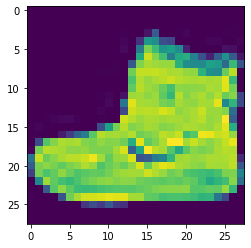

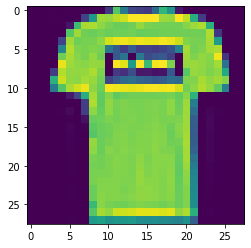

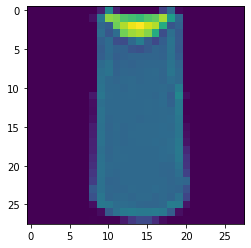

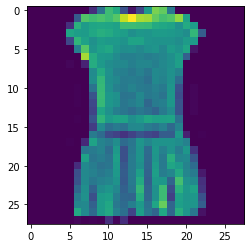

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainX.shape
trainX = np.expand_dims(trainX,axis=3)
for i in range(4):
  plt.imshow(trainX[i][:,:,0])
  plt.show()



/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


(25, 28, 28, 1)


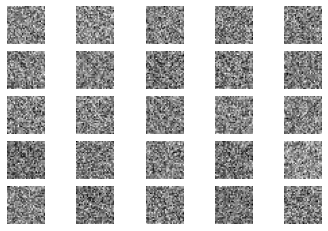

(25, 28, 28, 1)


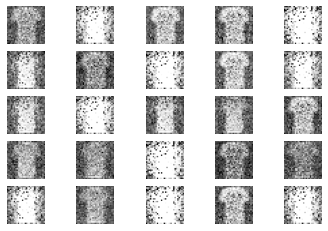

(25, 28, 28, 1)


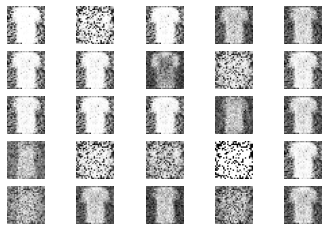

(25, 28, 28, 1)


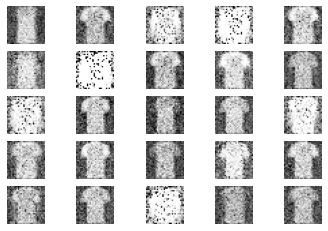

(25, 28, 28, 1)


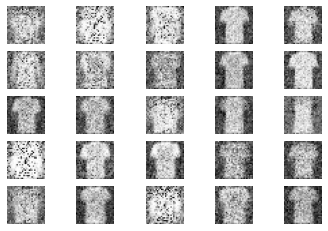

(25, 28, 28, 1)


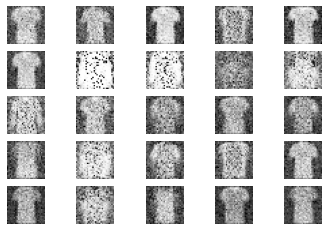

(25, 28, 28, 1)


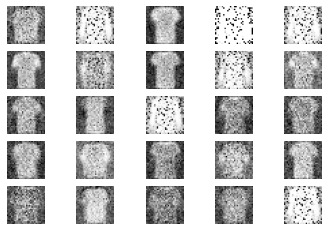

(25, 28, 28, 1)


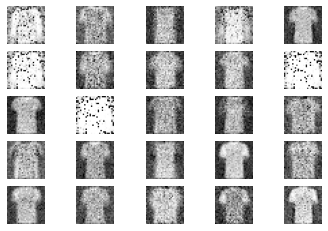

(25, 28, 28, 1)


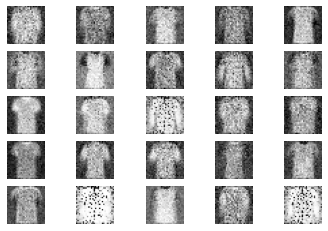

(25, 28, 28, 1)


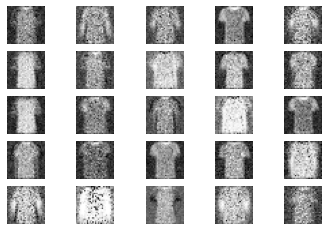

(25, 28, 28, 1)


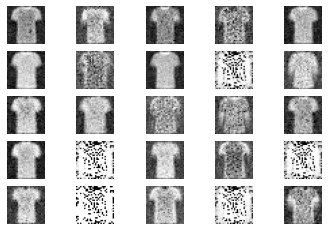

(25, 28, 28, 1)


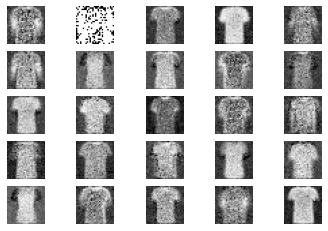

(25, 28, 28, 1)


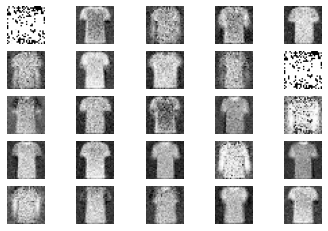

(25, 28, 28, 1)


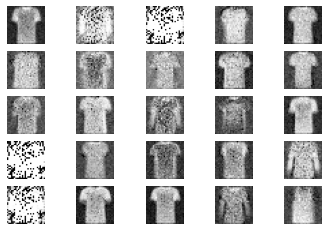

(25, 28, 28, 1)


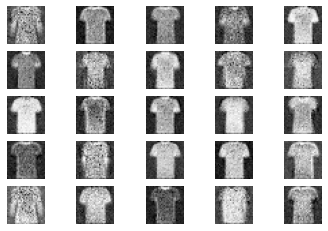

(25, 28, 28, 1)


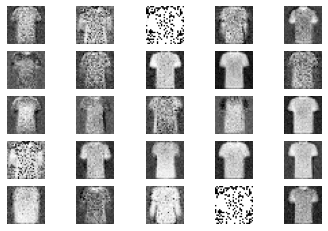

(25, 28, 28, 1)


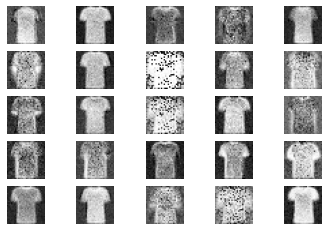

(25, 28, 28, 1)


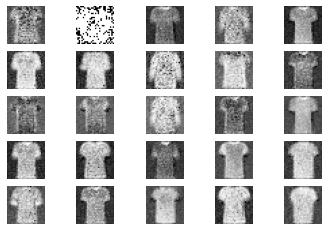

(25, 28, 28, 1)


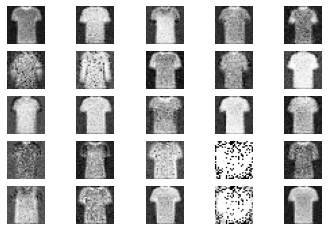

(25, 28, 28, 1)


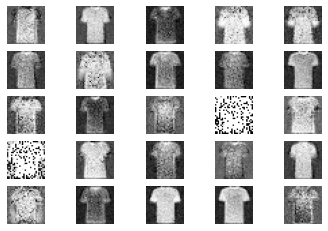

(25, 28, 28, 1)


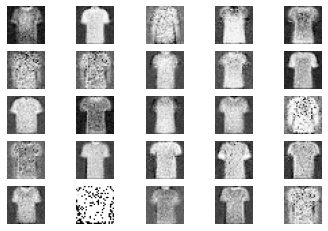

(25, 28, 28, 1)


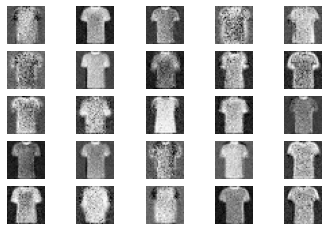

(25, 28, 28, 1)


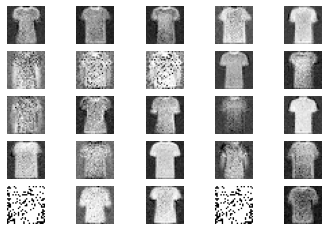

(25, 28, 28, 1)


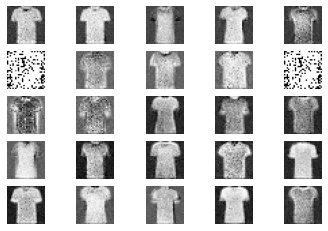

(25, 28, 28, 1)


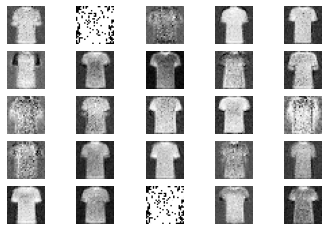

(25, 28, 28, 1)


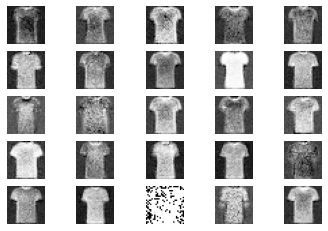

(25, 28, 28, 1)


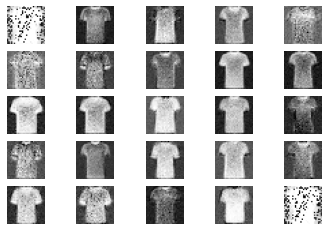

(25, 28, 28, 1)


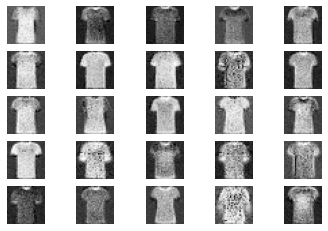

(25, 28, 28, 1)


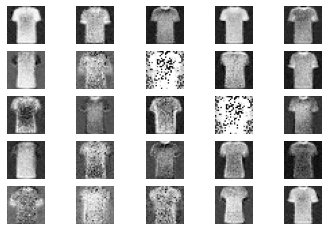

(25, 28, 28, 1)


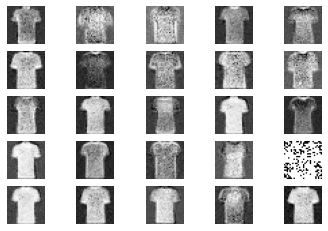

In [ ]:
gan.train(epochs=30000, batch_size=32, save_interval=1000)